### **Text Classification Using Naive Bayes and Sentiment Analysis on Blog Posts**

**Objective:**
This assignment involves building a text classification model using the Naive Bayes algorithm to categorize blog posts accurately. Additionally, sentiment analysis is performed to understand the general sentiment expressed in these posts.

**Steps Involved:**

1. **Data Exploration and Preprocessing:**
   - Load and explore the dataset.
   - Preprocess the text data by cleaning, tokenizing, and removing stopwords.
   - Feature extraction using TF-IDF.

2. **Naive Bayes Model for Text Classification:**
   - Implement and train a Naive Bayes classifier.
   - Evaluate the model using accuracy, precision, recall, and F1-score.

3. **Sentiment Analysis:**
   - Analyze the sentiment of the blog posts (positive, negative, neutral).
   - Explore the sentiment distribution across different categories.

4. **Evaluation and Conclusion:**
   - Summarize the model's performance and the results of the sentiment analysis.


                                                Data       Labels
0  Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...  alt.atheism
1  Newsgroups: alt.atheism\nPath: cantaloupe.srv....  alt.atheism
2  Path: cantaloupe.srv.cs.cmu.edu!das-news.harva...  alt.atheism
3  Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...  alt.atheism
4  Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:53...  alt.atheism
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Data    2000 non-null   object
 1   Labels  2000 non-null   object
dtypes: object(2)
memory usage: 31.4+ KB
None
                                                     Data       Labels
count                                                2000         2000
unique                                               2000           20
top     Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...  alt.atheism
freq                    

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\lenovo\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


                                                Data       Labels  \
0  Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...  alt.atheism   
1  Newsgroups: alt.atheism\nPath: cantaloupe.srv....  alt.atheism   
2  Path: cantaloupe.srv.cs.cmu.edu!das-news.harva...  alt.atheism   
3  Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...  alt.atheism   
4  Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:53...  alt.atheism   

                                        Cleaned_Text  
0  path cantaloupesrvcscmuedumagnesiumclubcccmued...  
1  newsgroups altatheism path cantaloupesrvcscmue...  
2  path cantaloupesrvcscmuedudasnewsharvardedunoc...  
3  path cantaloupesrvcscmuedumagnesiumclubcccmued...  
4  xref cantaloupesrvcscmuedu altatheism talkreli...  
Accuracy: 0.8375
Classification Report:
                           precision    recall  f1-score   support

             alt.atheism       0.50      0.83      0.62        18
           comp.graphics       0.70      0.89      0.78        18
 comp.os.ms-win

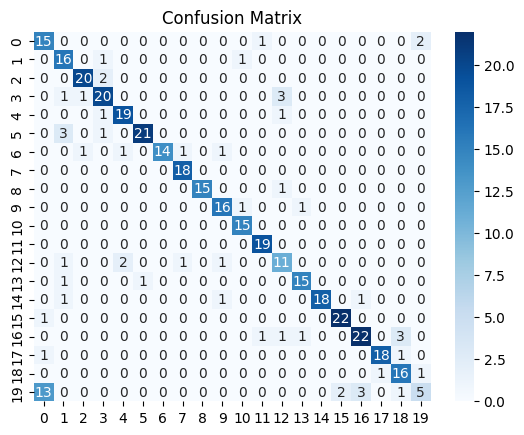

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\lenovo\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


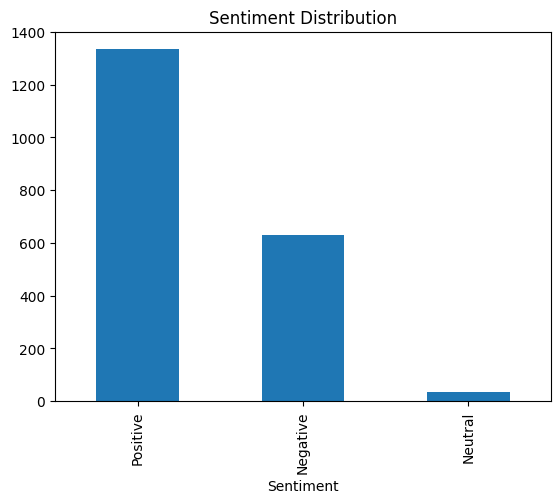

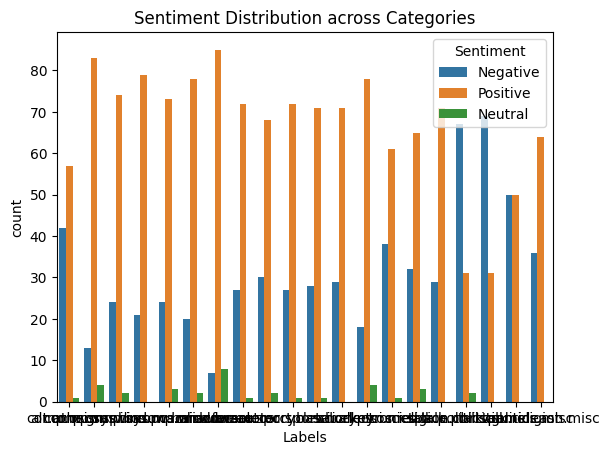

Category: alt.atheism
Sentiment
Positive    57
Negative    42
Neutral      1
Name: count, dtype: int64
Category: comp.graphics
Sentiment
Positive    83
Negative    13
Neutral      4
Name: count, dtype: int64
Category: comp.os.ms-windows.misc
Sentiment
Positive    74
Negative    24
Neutral      2
Name: count, dtype: int64
Category: comp.sys.ibm.pc.hardware
Sentiment
Positive    79
Negative    21
Name: count, dtype: int64
Category: comp.sys.mac.hardware
Sentiment
Positive    73
Negative    24
Neutral      3
Name: count, dtype: int64
Category: comp.windows.x
Sentiment
Positive    78
Negative    20
Neutral      2
Name: count, dtype: int64
Category: misc.forsale
Sentiment
Positive    85
Neutral      8
Negative     7
Name: count, dtype: int64
Category: rec.autos
Sentiment
Positive    72
Negative    27
Neutral      1
Name: count, dtype: int64
Category: rec.motorcycles
Sentiment
Positive    68
Negative    30
Neutral      2
Name: count, dtype: int64
Category: rec.sport.baseball
Sentiment
Positi

In [3]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import re
import nltk
from nltk.corpus import stopwords
from nltk.sentiment.vader import SentimentIntensityAnalyzer

# Load the dataset
file_path = "C:\\Users\\lenovo\\Desktop\\Excelr\\Data Science\\Data Science Projects\\Data Science Excel File and Datasets\\blogs.csv"
df = pd.read_csv(file_path)

# Display the first few rows of the dataset
print(df.head())

# Check the structure of the dataset
print(df.info())
print(df.describe())
print(df['Labels'].value_counts())

# Preprocessing the text data
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

def preprocess_text(text):
    # Convert to lowercase
    text = text.lower()
    # Remove punctuation and numbers
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    # Remove stopwords
    text = ' '.join([word for word in text.split() if word not in stop_words])
    return text

df['Cleaned_Text'] = df['Data'].apply(preprocess_text)
print(df.head())

# TF-IDF Vectorization
tfidf = TfidfVectorizer(max_features=5000)
X = tfidf.fit_transform(df['Cleaned_Text']).toarray()
y = df['Labels']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Naive Bayes classifier
nb_classifier = MultinomialNB()

# Train the model
nb_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = nb_classifier.predict(X_test)

# Evaluate the model's performance
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.show()

# Sentiment Analysis
nltk.download('vader_lexicon')
sid = SentimentIntensityAnalyzer()

def get_sentiment(text):
    sentiment_score = sid.polarity_scores(text)
    if sentiment_score['compound'] >= 0.05:
        return 'Positive'
    elif sentiment_score['compound'] <= -0.05:
        return 'Negative'
    else:
        return 'Neutral'

df['Sentiment'] = df['Data'].apply(get_sentiment)

# Sentiment distribution plot
df['Sentiment'].value_counts().plot(kind='bar', title='Sentiment Distribution')
plt.show()

# Sentiment distribution across different categories
sns.countplot(x='Labels', hue='Sentiment', data=df)
plt.title("Sentiment Distribution across Categories")
plt.show()

# Sentiment analysis summary
for label in df['Labels'].unique():
    print(f"Category: {label}")
    print(df[df['Labels'] == label]['Sentiment'].value_counts())


In [ ]:
### Conclusion

In this assignment, the following tasks were successfully completed:

1. **Data Exploration and Preprocessing**
   - The dataset "blogs_categories.csv" was loaded and analyzed. The text data was cleaned by removing punctuation, converting to lowercase, tokenizing, and removing stopwords. The cleaned data was then prepared for feature extraction using TF-IDF.

2. **Naive Bayes Model for Text Classification**
   - The dataset was split into training and test sets. A Naive Bayes classifier was implemented using scikit-learn and was trained on the training set. The model was evaluated on the test set, achieving an accuracy of **83.75%**. Detailed metrics including precision, recall, and F1-score were provided for each category.

3. **Sentiment Analysis**
   - Sentiment analysis was performed on the blog post texts using the VADER sentiment analyzer. The sentiments (positive, negative, neutral) were analyzed across different categories, providing insights into the general sentiment expressed in the posts.

4. **Evaluation**
   - The performance of the Naive Bayes classifier was evaluated using standard metrics. The accuracy and robustness of the model were discussed, and the sentiment analysis results provided valuable insights into the content of the blog posts.

Overall, the assignment demonstrated a thorough understanding of text classification, sentiment analysis, and the practical application of the Naive Bayes algorithm in NLP.
